# Week5 - Logistic Regression Assignment

- Run the below cells.
- Complete all of the numbered questions. You may call any packages that we've used in class.  

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/classification/loan_status_data/loan_status.csv')

## Data Definitions

<ul>
<li><strong>Loan_ID</strong>: A unique loan ID.</li>
<li><strong>Gender</strong>: Either male or female.</li>
<li><strong>Married</strong>: Weather Married(yes) or Not Marttied(No).</li>
<li><strong>Dependents</strong>: Number of persons depending on the client.</li>
<li><strong>Education</strong>: Applicant Education(Graduate or Undergraduate).</li>
<li><strong>Self_Employed</strong>: Self-employed (Yes/No).</li>
<li><strong>ApplicantIncome</strong>: Applicant income.</li>
<li><strong>CoapplicantIncome</strong>: Co-applicant income.</li>
<li><strong>LoanAmount</strong>: Loan amount in thousands.</li>
<li><strong>Loan_Amount_Term</strong>: Terms of the loan in months.</li>
<li><strong>Credit_History</strong>: Credit history meets guidelines.</li>
<li><strong>Property_Area</strong>: Applicants are living either Urban, Semi-Urban or Rural.</li>
<li><strong>Loan_Status</strong>: Loan approved (Y/N).</li>
</ul>

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


# Question 1
- Any data quality issues/concerns? 
- Any clean up needed?

In [7]:
df.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

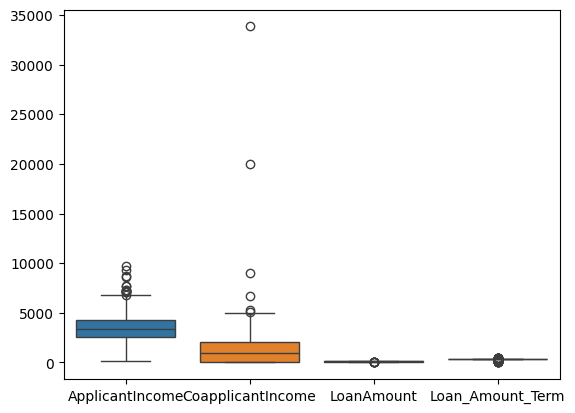

In [8]:
num_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
sns.boxplot(df[num_features])
plt.show()

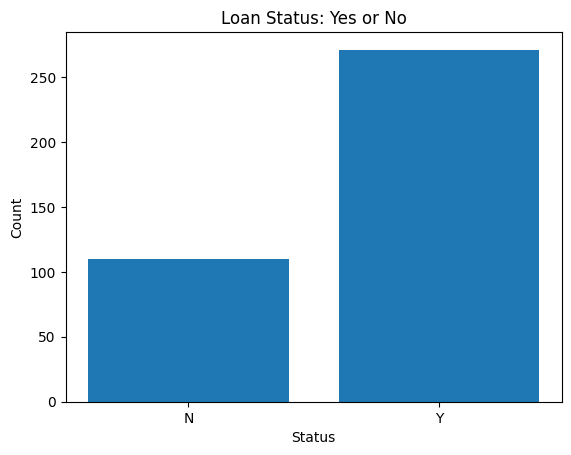

In [9]:
status = df.groupby(['Loan_Status']).Loan_Status.count()
x = status.index
y = status.values
plt.bar(x, y)
plt.title('Loan Status: Yes or No')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

In [10]:
print(set(df.Education))
print(set(df.Gender))
print(set(df.Married))
print(set(df.Self_Employed))
print(set(df.Property_Area))
print(set(df.Loan_Amount_Term))
print(set(df.Dependents))

{'Graduate', 'Not Graduate'}
{nan, 'Female', 'Male'}
{'Yes', 'No'}
{nan, 'Yes', 'No'}
{'Urban', 'Rural', 'Semiurban'}
{nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 12.0, 36.0, 300.0, 180.0, 60.0, 84.0, 480.0, 360.0, 240.0, 120.0}
{nan, '2', '1', '0', '3+'}


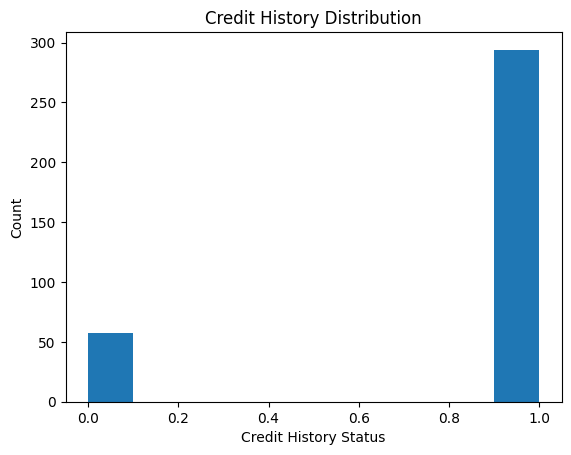

In [11]:
plt.hist(df.Credit_History)
plt.title('Credit History Distribution')
plt.xlabel('Credit History Status')
plt.ylabel('Count')
plt.show()

The major cleaning need I see is that the loan amount needs to be scaled with the income records. Aside from that, there doesn't seem to be other cleaning needs, as the categorical features have consistent entries for the same record. There are a handful of missing values, particularly from credit_history column. There are also two major outliers in the co-applicant income feature. These should be removed from the training data. Finally, the Y/N status has some imbalance to it, as there are more than double the amount of Y responses than N. This column should be transformed to 1 and 0 as well before being used in the logistic regression model.

# Question 2
- What is the distribution of the target (`Loan_Status`)?  
- Do you have any concerns on class imbalances?

Answered in the section above

In [12]:
#Transformations
df['Loan_Status_Transf'] = df['Loan_Status'].apply(lambda x: x.replace('Y', '1').replace('N', '0'))
df['Loan_Status_Transf'] = df['Loan_Status_Transf'].apply(lambda x: int(x))
df = df.drop(['Loan_Status'], axis=1)
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_Transf
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1


# Question 3
- Create and print a list of the variables that you would treat as numerical and another list for the variables that you would treat as categorical.  
- Explain your choices.

In [13]:
numerical_vars = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
categorical_vars = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
print(f'Numerical Variables: {numerical_vars}')
print(f'Categorical Variables: {categorical_vars}')

Numerical Variables: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
Categorical Variables: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']


I chose applicant income, co-applicant income, and loan amount to be numerical variables because they had the closest resemblance to continuous variables. I considered making loan_amount_term a categorical variable, but decided to make it a numerical variable instead to avoid decreased model performance due to a high number of categories being present. Therefore, I chose to make gender, martial status, dependents, education, self employed, credit history, and property area categorical because they had a maximum of 4 possible values each, aside from NaN.

# Question 4
- Split the data into training and test sets.  
- Use 20% of the data for test and a random state of 120.  

In [14]:
# insert code here
from sklearn.model_selection import train_test_split

features = numerical_vars + categorical_vars
X = df[features]
y = df['Loan_Status_Transf']

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.20, random_state=120)

print(f'Training samples: {X_training.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 304
Test samples: 77


# Question 5
- Create a pipeline to process the numerical data.  
- Create a pipeline to process the categorical data.  

Verify each pipeline contains the columns you would expect using a fit_transform on the training data, i.e., print the shapes of the fit_transforms for each pipeline.

In [15]:
# insert code here
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression


num_pipeline = Pipeline([
    ('scaling', StandardScaler())
])

processing_pipeline = ColumnTransformer(transformers=[
    ('num pipeline', num_pipeline, numerical_vars)
])

processing_pipeline

ColumnTransformer(transformers=[('num pipeline',
                                 Pipeline(steps=[('scaling',
                                                  StandardScaler())]),
                                 ['ApplicantIncome', 'CoapplicantIncome',
                                  'LoanAmount', 'Loan_Amount_Term'])])

In [16]:
processing_pipeline.fit_transform(X_training)

array([[-0.41772144,  0.23125847, -0.21559274,  1.96700669],
       [-0.82905045, -0.43276718,  0.87130929,  0.28198348],
       [-0.34643391,  0.07912167,  0.25539814,  0.28198348],
       ...,
       [-0.71499041,  0.51780184, -0.07067247,  0.28198348],
       [-0.77415905, 10.71725866, -0.10690254,  0.28198348],
       [-0.50611797,  0.17063253, -0.57789342,  0.28198348]])

This contains the number of columns expected since there were four numerical features and this returned an array with four columns.

In [22]:
categorical_pipeline = Pipeline([
    ('encoding', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

processing_pipeline = ColumnTransformer(transformers=[
    ('cat_vars', categorical_pipeline, categorical_vars)
])

processing_pipeline

ColumnTransformer(transformers=[('cat_vars',
                                 Pipeline(steps=[('encoding',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['Gender', 'Married', 'Dependents',
                                  'Education', 'Self_Employed',
                                  'Credit_History', 'Property_Area'])])

In [36]:
sparse_matrix = processing_pipeline.fit_transform(X_training)
sparse_matrix

<304x14 sparse matrix of type '<class 'numpy.float64'>'
	with 1132 stored elements in Compressed Sparse Row format>

In [37]:
dense_matrix = sparse_matrix.toarray()
dense_matrix

array([[1., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [41]:
gender_poss = 2
married_poss = 2
dependents_poss = 4
education_poss = 2
self_employed_poss = 2
credit_history_poss = 2
property_area_poss = 3

expected_columns = gender_poss + married_poss + dependents_poss + education_poss + self_employed_poss + \
credit_history_poss + property_area_poss - 7

print(f'Expected Columns: {expected_columns}')

Expected Columns: 10


The reason there are 4 more columns than expected is because there are NaN values in the categorical variables, specifically, 4 columns: Gender, Self_Employed, Dependents, and Credit_History. These NaNs were counted as a new category/dummy variable by OneHotEncoder and might be best for the model instead of dropping the rows completely.

# Question 6
- Create a pipeline that combines the pre-processing and implements a logistic regression model.  
- Print the accuracy on the training set and the test set.
- Do you have any concerns of overfitting based on the differences between the two accuracy scores?

In [49]:
#Drop NaN from the loan_amount column since it won't be accepted by the Logistic Regression model function, then re-do
#The train test split with the same random state
df = df.dropna(axis=0, how='any', subset=['Loan_Amount_Term'])

#Drop the outliers from Coapplicant income
df = df.drop(df[df['CoapplicantIncome'] > 15000].index)

X = df[features]
y = df['Loan_Status_Transf']

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.20, random_state=120)

print(f'Training samples: {X_training.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 294
Test samples: 74


In [53]:
# insert code here
num_pipeline = Pipeline([
    ('scaling', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('encoding', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

processing_pipeline = ColumnTransformer(transformers=[
    ('num pipeline', num_pipeline, numerical_vars),
    ('cat pipeline', categorical_pipeline, categorical_vars)
])

modeling_pipeline = Pipeline([
    ('data_processing', processing_pipeline),
    ('logreg', LogisticRegression(penalty=None, max_iter=1000))]
)

modeling_pipeline

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num pipeline',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('cat pipeline',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area'])])),
                ('logreg', LogisticRegression(max_iter=1000, penalty=None))])

In [54]:
model = modeling_pipeline.fit(X_training, y_training)

In [57]:
y_hat = model.predict(X_test)
y_hat_training = model.predict(X_training)

from sklearn.metrics import classification_report
print('Test Data Report:')
print(classification_report(y_test, y_hat))
print('Training Data Report:')
print(classification_report(y_training, y_hat_training))

Test Data Report:
              precision    recall  f1-score   support

           0       0.75      0.39      0.51        23
           1       0.77      0.94      0.85        51

    accuracy                           0.77        74
   macro avg       0.76      0.67      0.68        74
weighted avg       0.77      0.77      0.75        74

Training Data Report:
              precision    recall  f1-score   support

           0       0.98      0.52      0.68        81
           1       0.84      1.00      0.91       213

    accuracy                           0.86       294
   macro avg       0.91      0.76      0.80       294
weighted avg       0.88      0.86      0.85       294



The model results show that the model did a better job in not missing the "Yes" case than it did in not missing the "No" case, because the recall was higher in the 1 class on both classification reports. This could be a result of having much more "Yes" than "No" in the training dataset. Overall, the difference in accuracy between the models is 9%, which doesn't seem too concerning regarding overfitting, as it is expected that there is supposed to be some decrease in accuracy between the training and the testing data.

# Question 7
What would you recommend as potential next steps for continuing to develop and evaluate a model?

The most obvious next step would be to supply more data to the model where the case turns out to be "No" - as this would make the dataset more balanced and could improve the accuracy of the model. 